In [1]:
from datetime import datetime, timedelta
import pytz
import pandas as pd
from tqdm import tqdm
from modeler.modeler import Modeler as m
from processor.processor import Processor as p
from database.market import Market
from database.adatabase import ADatabase
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib.dates as mdates
import statistics

In [2]:
market = Market()
btc_spec = ADatabase("bitcoin_speculation")

In [3]:
market.connect()
prices = market.retrieve("pdr_crypto")
market.disconnect()

In [9]:
prices = p.column_date_processing(prices)

In [6]:
training_year = 1
btc_spec.connect()
sim = btc_spec.retrieve("pdr_sim")
btc_spec.disconnect()

In [12]:
sim["prediction"] = (sim["cat_prediction"] + sim["skl_prediction"] + sim["xgb_prediction"]) / 3

In [13]:
final = prices.merge(sim[sim["training_year"]==training_year],on="date",how="right")

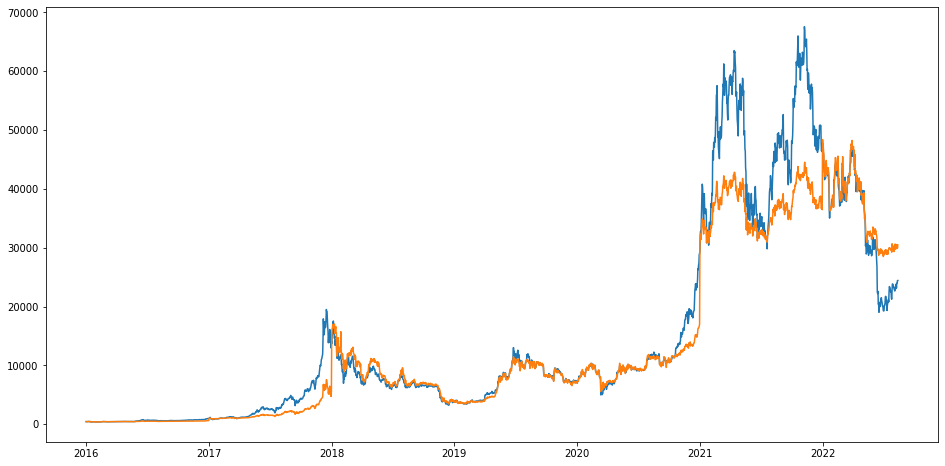

In [17]:
figure, axes = plt.subplots(figsize=(16, 8))
axes.plot(final["date"],final["close"])
axes.plot(final["date"],final["prediction"])
plt.show()